In [1]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [2]:
# Reading the applicant dataset in a dataframe using Pandas
data = pd.read_csv("applicant.csv")

# Reading the test loan in a dataframe using Pandas
loan = pd.read_csv("loan.csv")


In [3]:
data.head(10)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
5,1213971,35,male,single,2,for free,4,unskilled - resident,1 year,4 years,Registered under the applicant's name,1,NaN,NaN,NaN
6,1428822,53,male,single,1,own,4,skilled employee / official,7 years,NaN,NaN,1,High,NaN,NaN
7,1705739,35,male,single,1,rent,2,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,0,2 lac
8,1715169,61,male,divorced/separated,1,own,4,unskilled - resident,4 years,7 years,NaN,1,Very high,NaN,NaN
9,1722991,28,male,married/widowed,1,own,2,management / self-employed / highly qualified ...,NaN,0 year,NaN,1,Low,0,2 lac


In [4]:
loan.head(10)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
5,d68d9b1e-edad-11ea-8b43-2b6a0308d487,1213971,36,education,9055000,2,NaN,0,0,NaN,1,existing loans paid back duly till now,0
6,d68d9bb4-edad-11ea-bb16-0490ef14f12e,1428822,24,FF&E,2835000,3,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
7,d68d9c40-edad-11ea-b46c-5067ccf3672a,1705739,36,used vehicle,6948000,2,car or other,0,0,NaN,1,existing loans paid back duly till now,0
8,d68d9cc2-edad-11ea-95a3-19eea692401f,1715169,12,electronic equipment,3059000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,0
9,d68d9d4e-edad-11ea-99f2-2c0022cf7ade,1722991,30,new vehicle,5234000,4,car or other,0,0,NaN,2,critical/pending loans at other banks,1


In [5]:
df = pd.merge(data,loan,on='applicant_id',how='inner')# merging the both dataset on applicant id`/

In [6]:
df.drop(columns=['Other_EMI_plans','Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','Has_been_employed_for_at_most'],axis=1,inplace=True)
#drop this column as they have more than 50% data as null value

In [7]:
df['Has_been_employed_for_at_least'].fillna('1 year',inplace=True)
# fill with mode value

In [8]:
df['Savings_account_balance'].fillna(method='bfill',inplace = True) 
#as most of account have low balance,using forward fill to not making data bias

In [9]:
df['Purpose'].fillna('electronic equipment', inplace = True)

In [10]:
df['Property'].fillna('car or other',inplace = True)

In [11]:
df.isnull().sum()

applicant_id                                   0
Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Has_been_employed_for_at_least                 0
Foreign_worker                                 0
Savings_account_balance                        0
loan_application_id                            0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history        

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   applicant_id                                 1000 non-null   int64 
 1   Primary_applicant_age_in_years               1000 non-null   int64 
 2   Gender                                       1000 non-null   object
 3   Marital_status                               1000 non-null   object
 4   Number_of_dependents                         1000 non-null   int64 
 5   Housing                                      1000 non-null   object
 6   Years_at_current_residence                   1000 non-null   int64 
 7   Employment_status                            1000 non-null   object
 8   Has_been_employed_for_at_least               1000 non-null   object
 9   Foreign_worker                               1000 non-null   int64 
 10  Savings_accou

# Data Preparation for Model Building

In [13]:
# Convert all non-numeric values to number
cat=['Gender','Marital_status','Housing','Employment_status','Savings_account_balance','Purpose','Property','Has_been_employed_for_at_least','Loan_history']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

applicant_id                                    int64
Primary_applicant_age_in_years                  int64
Gender                                          int32
Marital_status                                  int32
Number_of_dependents                            int64
Housing                                         int32
Years_at_current_residence                      int64
Employment_status                               int32
Has_been_employed_for_at_least                  int32
Foreign_worker                                  int64
Savings_account_balance                         int32
loan_application_id                            object
Months_loan_taken_for                           int64
Purpose                                         int32
Principal_loan_amount                           int64
EMI_rate_in_percentage_of_disposable_income     int64
Property                                        int32
Has_coapplicant                                 int64
Has_guarantor               

In [14]:
df.drop(columns=['loan_application_id','applicant_id'])

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,1,3,1,1,4,1,3,1,1,6,5,1169000,4,2,0,0,2,1,0
1,22,0,1,1,1,2,1,1,1,1,48,5,5951000,2,2,0,0,1,3,1
2,49,1,3,2,1,3,3,2,1,1,12,4,2096000,2,2,0,0,1,1,0
3,45,1,3,2,0,4,1,2,1,1,42,0,7882000,2,0,0,1,1,3,0
4,53,1,3,2,0,4,1,1,1,1,24,6,4870000,3,1,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,1,4,3,2,1,1,12,0,1736000,3,2,0,0,1,3,0
996,40,1,0,1,1,4,0,1,1,1,30,8,3857000,4,0,0,0,1,3,0
997,38,1,3,1,1,4,1,3,1,1,12,5,804000,4,1,0,0,1,3,0
998,23,1,3,1,0,4,1,1,1,1,45,5,1845000,4,1,0,0,1,3,1


In [15]:
##Let us check if there is high multi collinerity between features
x_corr=df.corr()
x_corr

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
applicant_id,1.000000,-0.010583,0.028311,0.037413,0.017048,-0.058416,-0.028017,-0.007027,0.009940,0.066389,...,0.009359,-0.050967,-0.056669,0.002269,-0.053141,-0.012961,0.011860,-0.038409,-0.000260,-0.029125
Primary_applicant_age_in_years,-0.010583,1.000000,0.161694,0.147954,0.118201,-0.301419,0.266419,-0.001637,0.345899,0.006151,...,-0.036136,0.125098,0.032716,0.058266,0.024190,-0.018357,-0.023923,0.149254,-0.157261,-0.091127
Gender,0.028311,0.161694,1.000000,0.748342,0.203431,-0.219844,-0.013818,-0.041278,0.211276,-0.051202,...,0.081432,0.070887,0.093482,0.086302,0.016628,0.007742,0.010907,0.094260,-0.059183,-0.075493
Marital_status,0.037413,0.147954,0.748342,1.000000,0.256475,-0.225034,0.041256,-0.025732,0.238441,-0.046226,...,0.093721,0.112561,0.102481,0.138389,-0.030042,0.026430,0.016897,0.111867,-0.083229,-0.095055
Number_of_dependents,0.017048,0.118201,0.203431,0.256475,1.000000,-0.114508,0.042643,0.127146,0.092898,-0.077071,...,-0.023834,0.101414,0.017142,-0.071207,0.016420,-0.032817,0.036589,0.109667,-0.070008,-0.003015
Housing,-0.058416,-0.301419,-0.219844,-0.225034,-0.114508,1.000000,-0.011941,0.106596,-0.168914,-0.063582,...,-0.157049,-0.124235,-0.135632,-0.089405,0.016984,0.038835,0.053505,-0.048591,0.084026,0.019315
Years_at_current_residence,-0.028017,0.266419,-0.013818,0.041256,0.042643,-0.011941,1.000000,0.000450,0.298831,0.054097,...,0.034067,0.067490,0.028926,0.049302,-0.039608,0.001623,-0.028334,0.089625,-0.086987,0.002967
Employment_status,-0.007027,-0.001637,-0.041278,-0.025732,0.127146,0.106596,0.000450,1.000000,-0.106024,-0.100028,...,-0.215438,-0.039119,-0.261139,-0.078090,0.154159,-0.027902,0.079757,0.004544,-0.013921,-0.032756
Has_been_employed_for_at_least,0.009940,0.345899,0.211276,0.238441,0.092898,-0.168914,0.298831,-0.106024,1.000000,0.054534,...,0.063705,0.090672,0.029988,0.122552,-0.023198,-0.008790,-0.018964,0.150685,-0.146365,-0.115270
Foreign_worker,0.066389,0.006151,-0.051202,-0.046226,-0.077071,-0.063582,0.054097,-0.100028,0.054534,1.000000,...,0.138196,-0.050304,0.050050,0.090024,-0.045555,-0.066338,-0.097256,0.009717,0.000513,0.082079


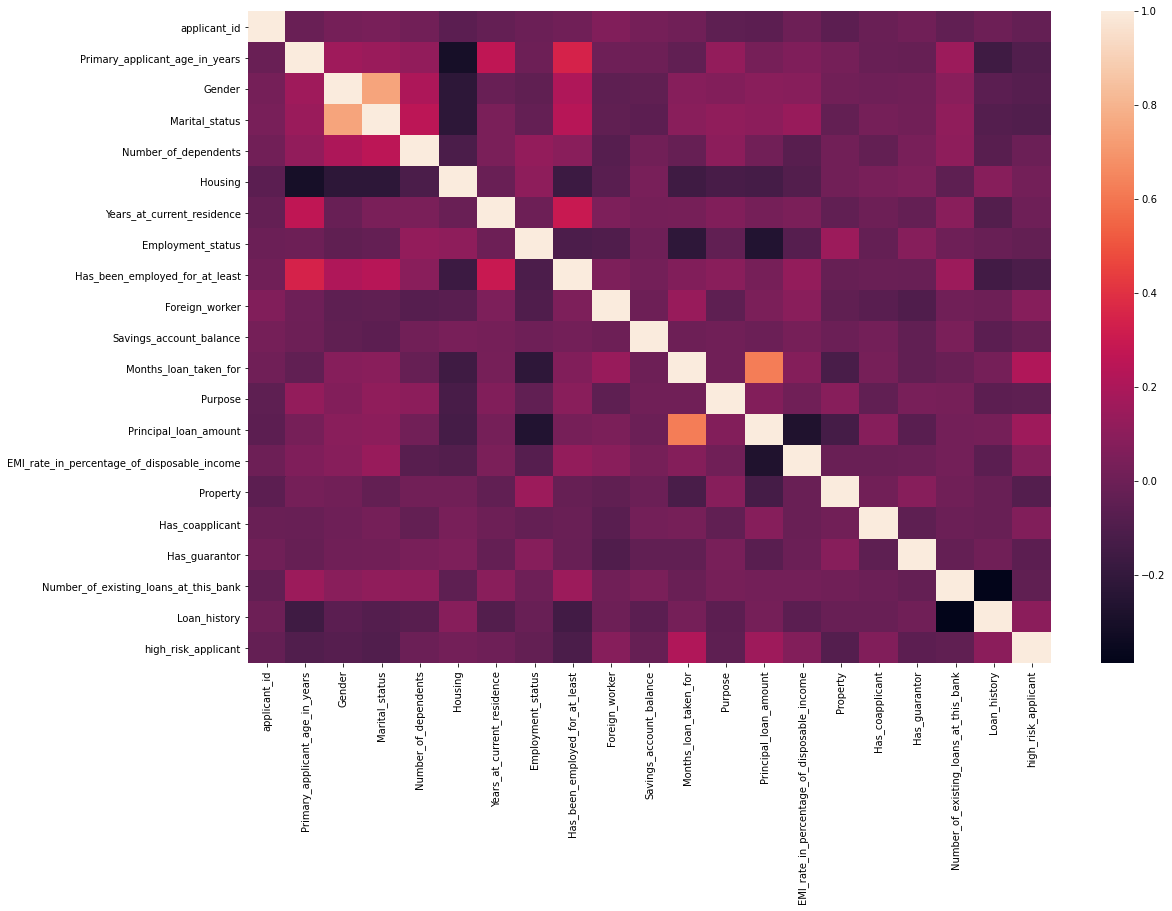

In [16]:
##check the multicollinearity
plt.figure(figsize=(18,12))
sns.heatmap(df.corr())
plt.show()

In [17]:
#principal loan amount is positive corelated with months loan taken for

In [18]:
pd.set_option('display.max_columns',None)
df

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,1,3,1,1,4,1,3,1,1,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,5,1169000,4,2,0,0,2,1,0
1,1203873,22,0,1,1,1,2,1,1,1,1,d68d989e-edad-11ea-b1d5-2bcf65006448,48,5,5951000,2,2,0,0,1,3,1
2,1432761,49,1,3,2,1,3,3,2,1,1,d68d995c-edad-11ea-814a-1b6716782575,12,4,2096000,2,2,0,0,1,1,0
3,1207582,45,1,3,2,0,4,1,2,1,1,d68d99fc-edad-11ea-8841-17e8848060ae,42,0,7882000,2,0,0,1,1,3,0
4,1674436,53,1,3,2,0,4,1,1,1,1,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,6,4870000,3,1,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,0,1,1,1,4,3,2,1,1,d68fbba6-edad-11ea-80fe-30b2f9300e3d,12,0,1736000,3,2,0,0,1,3,0
996,1114064,40,1,0,1,1,4,0,1,1,1,d68fbc28-edad-11ea-bc62-4240ac0824fa,30,8,3857000,4,0,0,0,1,3,0
997,1758046,38,1,3,1,1,4,1,3,1,1,d68fbcaa-edad-11ea-aafc-2de1139e42cd,12,5,804000,4,1,0,0,1,3,0
998,1824545,23,1,3,1,0,4,1,1,1,1,d68fbd2c-edad-11ea-b49e-2894666f2df6,45,5,1845000,4,1,0,0,1,3,1


In [19]:
x=df.drop(columns =['high_risk_applicant','loan_application_id'],axis=1)
y=df['high_risk_applicant']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
m1=DecisionTreeClassifier()
m1.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=m1.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [24]:
accuracy_score(y_pred,y_test)

0.64

In [25]:
precision_score(y_test,y_pred)

0.36363636363636365

In [26]:
recall_score(y_test,y_pred)

0.3333333333333333

In [27]:
f1_score(y_test,y_pred)

0.34782608695652173

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       178
           1       0.36      0.33      0.35        72

    accuracy                           0.64       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.63      0.64      0.64       250



# Logistics regression 

In [29]:
from sklearn.linear_model import LogisticRegression


In [30]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
y_pred= model.predict(x_test)


In [31]:
accuracy_score(y_pred,y_test)

0.724

In [32]:
precision_score(y_test,y_pred)

1.0

In [33]:
recall_score(y_test,y_pred)

0.041666666666666664

In [34]:
f1_score(y_test,y_pred)

0.07999999999999999

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       178
           1       1.00      0.04      0.08        72

    accuracy                           0.72       250
   macro avg       0.86      0.52      0.46       250
weighted avg       0.80      0.72      0.62       250



In [36]:
# we can improve using hyper parametrs
#accuracy using logistic regression 72.4 and DTC is 64
